# The Sparks Foundations

<b>GRIP Program

# Task: Predicting the optimum number of clusters and representing it visually.

<b> we will use elbow method to determine the number of clusters.

Importing requried libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

Reading data from remote link.

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
data.shape

(150, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

<b>Finding the optimum number of clusters for k-means classification

In [7]:
x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

<b>Plotting the results onto a line graph, allowing us to observe <u>'The elbow'</u></b>

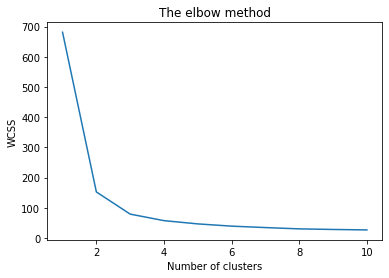

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<pre>From the above Graph we can clearly see the formatio of elbow onthe curve and WCSS(within cluster sum of square) is decressing with number of iteration and at cetrain point the graph tends to flatten. Here the elbow of curve = 3 so, the       number of clusters should be taken = "3".</pre>

# Creating K-Means Classifier and Predicting the values.

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = kmeans.fit_predict(x)

### 2D visualisation of clusters

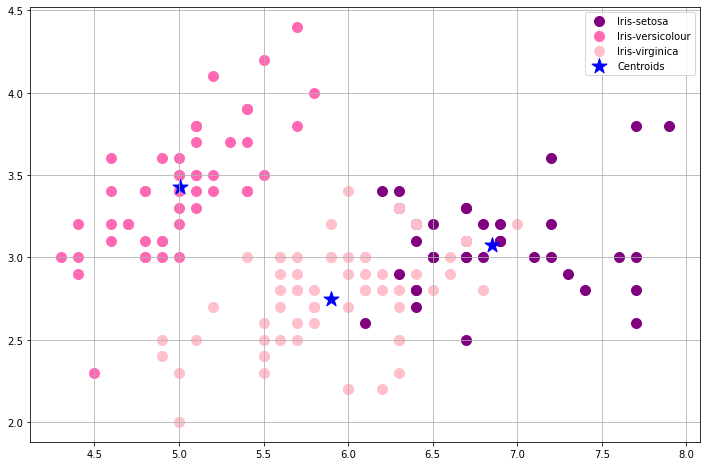

In [10]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize = (12,8))
plt.grid()
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'hotpink', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s = 100, c = 'pink', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 250, marker='*', c = 'blue', label = 'Centroids')
plt.legend()

### 3D visualisation of clusters

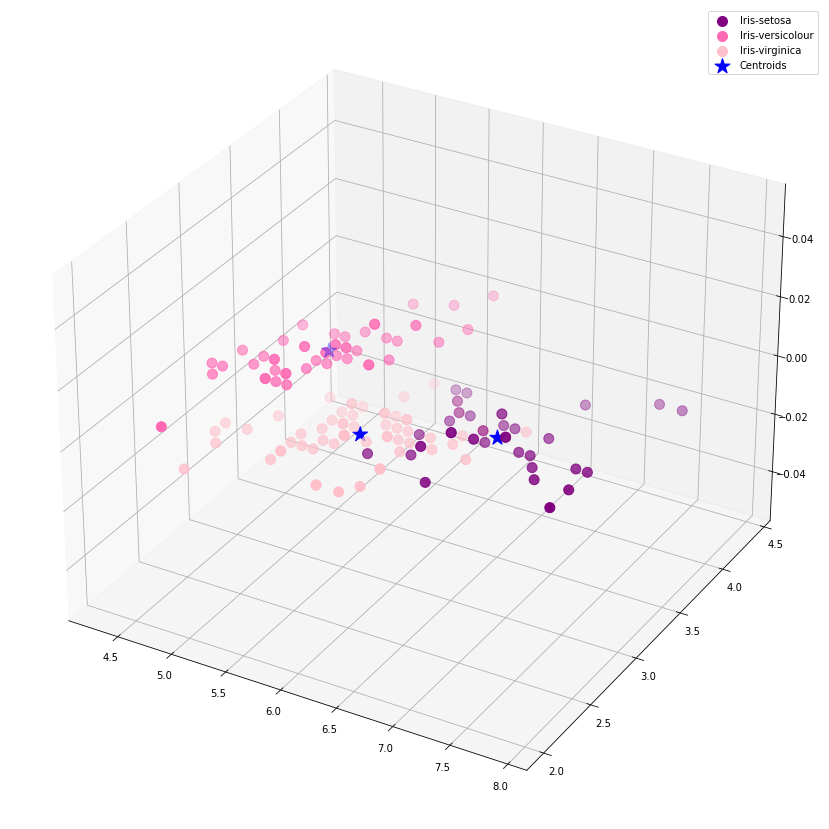

In [11]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'hotpink', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1],s = 100, c = 'pink', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 250,marker='*', c = 'blue', label = 'Centroids')
plt.legend()